<a href="https://colab.research.google.com/github/leeCodingStudio/Python_machine_learning/blob/master/10_lightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. credit 데이터셋 알아보기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
credit_df = pd.read_csv('/content/drive/MyDrive/KDT/4. 머신러닝과 딥러닝/credit.csv')

In [3]:
credit_df

,ID,Customer_ID,Name,Age,SSN,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,3,4,3,...,4.0,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.494089,Good
1,0x160e,CUS_0x21b1,Rick Rothackerj,28_,004-07-5839,_______,34847.84,2,4,6,...,2.0,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.2918252,Low_spent_Small_value_payments,470.690627,Standard
2,0x161a,CUS_0x2dbc,Langep,34,486-85-3974,_______,143162.64,1,5,8,...,3.0,1303.01,28.616735,17 Years and 9 Months,No,246.992320,168.4137027,!@9#%8,1043.315978,Good
3,0x1626,CUS_0xb891,Jasond,54,072-31-6145,Entrepreneur,30689.89,2,5,4,...,4.0,632.46,26.544229,17 Years and 3 Months,No,16.415452,81.22885871,Low_spent_Large_value_payments,433.604773,Standard
4,0x1632,CUS_0x1cdb,Deepaa,21,615-06-7821,Developer,35547.71_,7,5,5,...,4.0,943.86,39.797764,30 Years and 8 Months,Yes,0.000000,276.7253943,!@9#%8,288.605522,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,0x25fb6,CUS_0x372c,Lucia Mutikanik,18,340-85-7301,Lawyer,42903.79,0,4,6,...,1.0,1079.48,27.289440,28 Years and 1 Months,No,50894.000000,78.51494451,High_spent_Small_value_payments,493.341182,Good
12496,0x25fc2,CUS_0xf16,Maria Sheahanb,44,#F%$D@*&8,Media_Manager,16680.35,1,1,5,...,4.0,897.16,39.868572,NaN,NM,41.113561,52.95197782,High_spent_Small_value_payments,318.737378,Good
12497,0x25fce,CUS_0xaf61,Chris Wickhamm,49,133-16-7738,Writer,37188.1,1,4,5,...,3.0,620.64,39.080823,29 Years and 9 Months,No,84.205949,223.8750182,Low_spent_Small_value_payments,291.619866,Good
12498,0x25fda,CUS_0x8600,Sarah McBridec,28,031-35-0942,Architect,20002.88,10,8,29,...,9.0,3571.7_,22.895966,5 Years and 8 Months,Yes,60.964772,43.37067007,High_spent_Large_value_payments,328.655224,Poor


In [4]:
pd.set_option('display.max_columns', 50)

In [5]:
credit_df.head()

,ID,Customer_ID,Name,Age,SSN,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,4.0,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.494089,Good
1,0x160e,CUS_0x21b1,Rick Rothackerj,28_,004-07-5839,_______,34847.84,2,4,6,1,Credit-Builder Loan,3,4,2.0,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.2918252,Low_spent_Small_value_payments,470.690627,Standard
2,0x161a,CUS_0x2dbc,Langep,34,486-85-3974,_______,143162.64,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8,3.0,1303.01,28.616735,17 Years and 9 Months,No,246.992320,168.4137027,!@9#%8,1043.315978,Good
3,0x1626,CUS_0xb891,Jasond,54,072-31-6145,Entrepreneur,30689.89,2,5,4,1,Not Specified,0,6,4.0,632.46,26.544229,17 Years and 3 Months,No,16.415452,81.22885871,Low_spent_Large_value_payments,433.604773,Standard
4,0x1632,CUS_0x1cdb,Deepaa,21,615-06-7821,Developer,35547.71_,7,5,5,0,NaN,5,NaN,4.0,943.86,39.797764,30 Years and 8 Months,Yes,0.000000,276.7253943,!@9#%8,288.605522,Standard


In [6]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        12500 non-null  object 
 1   Customer_ID               12500 non-null  object 
 2   Name                      11273 non-null  object 
 3   Age                       12500 non-null  object 
 4   SSN                       12500 non-null  object 
 5   Occupation                12500 non-null  object 
 6   Annual_Income             12500 non-null  object 
 7   Num_Bank_Accounts         12500 non-null  int64  
 8   Num_Credit_Card           12500 non-null  int64  
 9   Interest_Rate             12500 non-null  int64  
 10  Num_of_Loan               12500 non-null  object 
 11  Type_of_Loan              11074 non-null  object 
 12  Delay_from_due_date       12500 non-null  int64  
 13  Num_of_Delayed_Payment    11657 non-null  object 
 14  Num_Cr

Left column (영어)   |   Right column (한글)
:---:              |   :---:
ID                 |   고유 식별자
Customer_ID        |   고객 ID
Name               |   이름
Age                |   나이
SSN                |   주민등록번호
Occupation         |   직업
Annual_Income      |   연간 소득
Num_Bank_Accounts  |   은행 계좌 수
Num_Credit_Card    |   신용 카드 수
Interest_Rate      |   이자율
Num_of_Loan        |   대출 수
Type_of_Loan       |   대출 유형
Delay_from_due_date|   마감일로부터 연체 기간
Num_of_Delayed_Payment    |   연체된 결제 수
Num_Credit_Inquiries      |   신용조회 수
Outstanding_Debt          |   미상환 잔금
Credit_Utilization_Ratio  |   신용카드 사용률
Credit_History_Age        |   카드 사용 기간
Payment_of_Min_Amount     |   리볼빙 여부
Total_EMI_per_month       |   월별 총 지출 금액
Amount_invested_monthly   |   매월 투자 금액
Payment_Behaviour         |   지불 행동
Monthly_Balance           |   월별 잔고
Credit_Score              |   신용 점수

In [7]:
credit_df.drop(['ID', 'Customer_ID', 'Name', 'SSN'], axis=1, inplace=True)

In [8]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  object 
 1   Occupation                12500 non-null  object 
 2   Annual_Income             12500 non-null  object 
 3   Num_Bank_Accounts         12500 non-null  int64  
 4   Num_Credit_Card           12500 non-null  int64  
 5   Interest_Rate             12500 non-null  int64  
 6   Num_of_Loan               12500 non-null  object 
 7   Type_of_Loan              11074 non-null  object 
 8   Delay_from_due_date       12500 non-null  int64  
 9   Num_of_Delayed_Payment    11657 non-null  object 
 10  Num_Credit_Inquiries      12264 non-null  float64
 11  Outstanding_Debt          12500 non-null  object 
 12  Credit_Utilization_Ratio  12500 non-null  float64
 13  Credit_History_Age        11387 non-null  object 
 14  Paymen

In [9]:
credit_df['Credit_Score'].value_counts()

Standard    6943
Poor        3582
Good        1975
Name: Credit_Score, dtype: int64

In [10]:
credit_df['Credit_Score'] = credit_df['Credit_Score'].replace({'Poor':0, 'Standard':1, 'Good':2})

In [11]:
credit_df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,4.0,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.494089,2
1,28_,_______,34847.84,2,4,6,1,Credit-Builder Loan,3,4,2.0,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.2918252,Low_spent_Small_value_payments,470.690627,1
2,34,_______,143162.64,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8,3.0,1303.01,28.616735,17 Years and 9 Months,No,246.992320,168.4137027,!@9#%8,1043.315978,2
3,54,Entrepreneur,30689.89,2,5,4,1,Not Specified,0,6,4.0,632.46,26.544229,17 Years and 3 Months,No,16.415452,81.22885871,Low_spent_Large_value_payments,433.604773,1
4,21,Developer,35547.71_,7,5,5,0,NaN,5,NaN,4.0,943.86,39.797764,30 Years and 8 Months,Yes,0.000000,276.7253943,!@9#%8,288.605522,1


In [12]:
credit_df.describe()

,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance,Credit_Score
count,12500.000000,12500.000000,12500.00000,12500.000000,12264.000000,12500.000000,12500.000000,12366.000000,12500.000000
mean,17.275120,21.647680,69.46520,21.051440,24.591650,32.291949,1303.781040,405.815391,0.871440
std,118.518214,123.789969,455.95698,14.859994,183.422458,5.084327,8118.261086,218.136964,0.654268
min,0.000000,1.000000,1.00000,-5.000000,0.000000,20.992914,0.000000,0.088628,0.000000
25%,3.000000,4.000000,8.00000,10.000000,2.000000,28.110034,29.128806,271.785749,0.000000
50%,6.000000,5.000000,13.00000,18.000000,4.000000,32.297912,66.372879,337.169588,1.000000
75%,7.000000,7.000000,20.00000,28.000000,8.000000,36.458660,149.904496,475.222487,1.000000
max,1779.000000,1479.000000,5788.00000,67.000000,2592.000000,49.564519,82122.000000,1602.040519,2.000000


<Axes: xlabel='Payment_of_Min_Amount', ylabel='Credit_Score'>

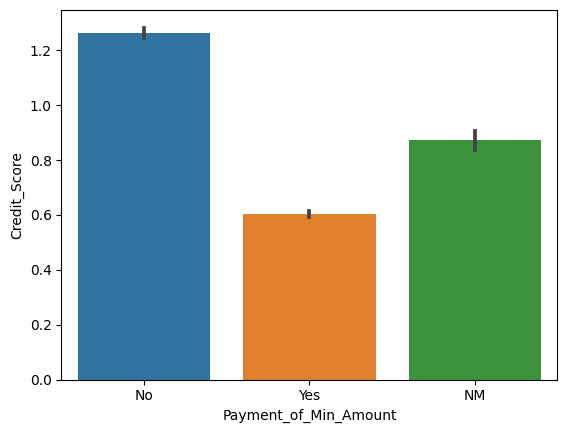

In [13]:
sns.barplot(x='Payment_of_Min_Amount', y='Credit_Score', data=credit_df)

<Axes: xlabel='Occupation', ylabel='Credit_Score'>

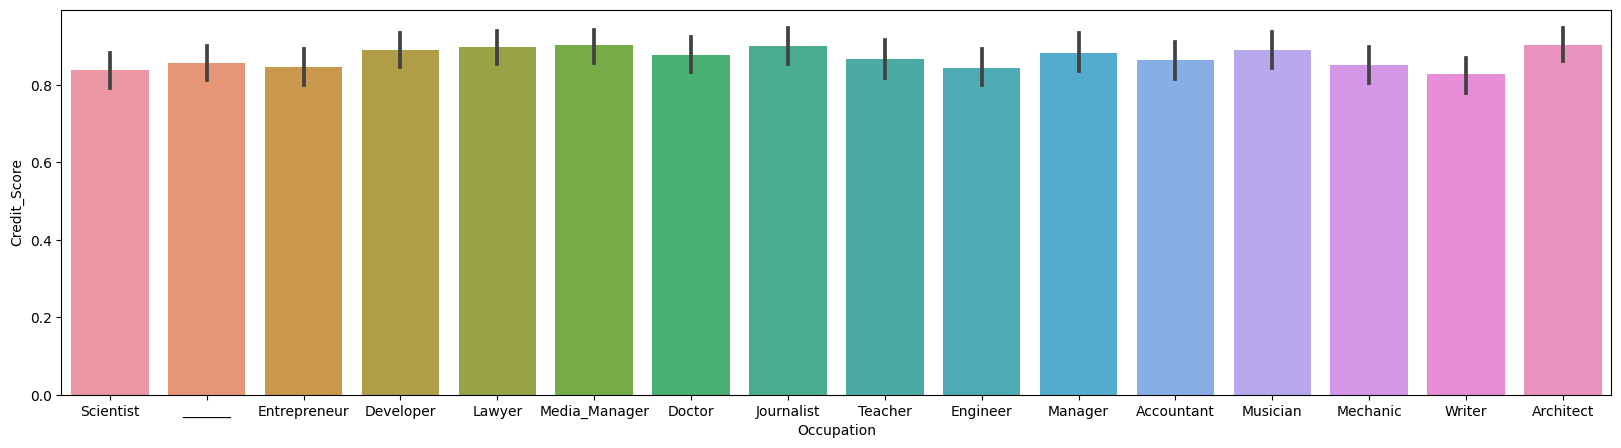

In [14]:
plt.figure(figsize=(20, 5))
sns.barplot(x='Occupation', y='Credit_Score', data=credit_df)

<ipython-input-15-755eee53a13a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(credit_df.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)


<Axes: >

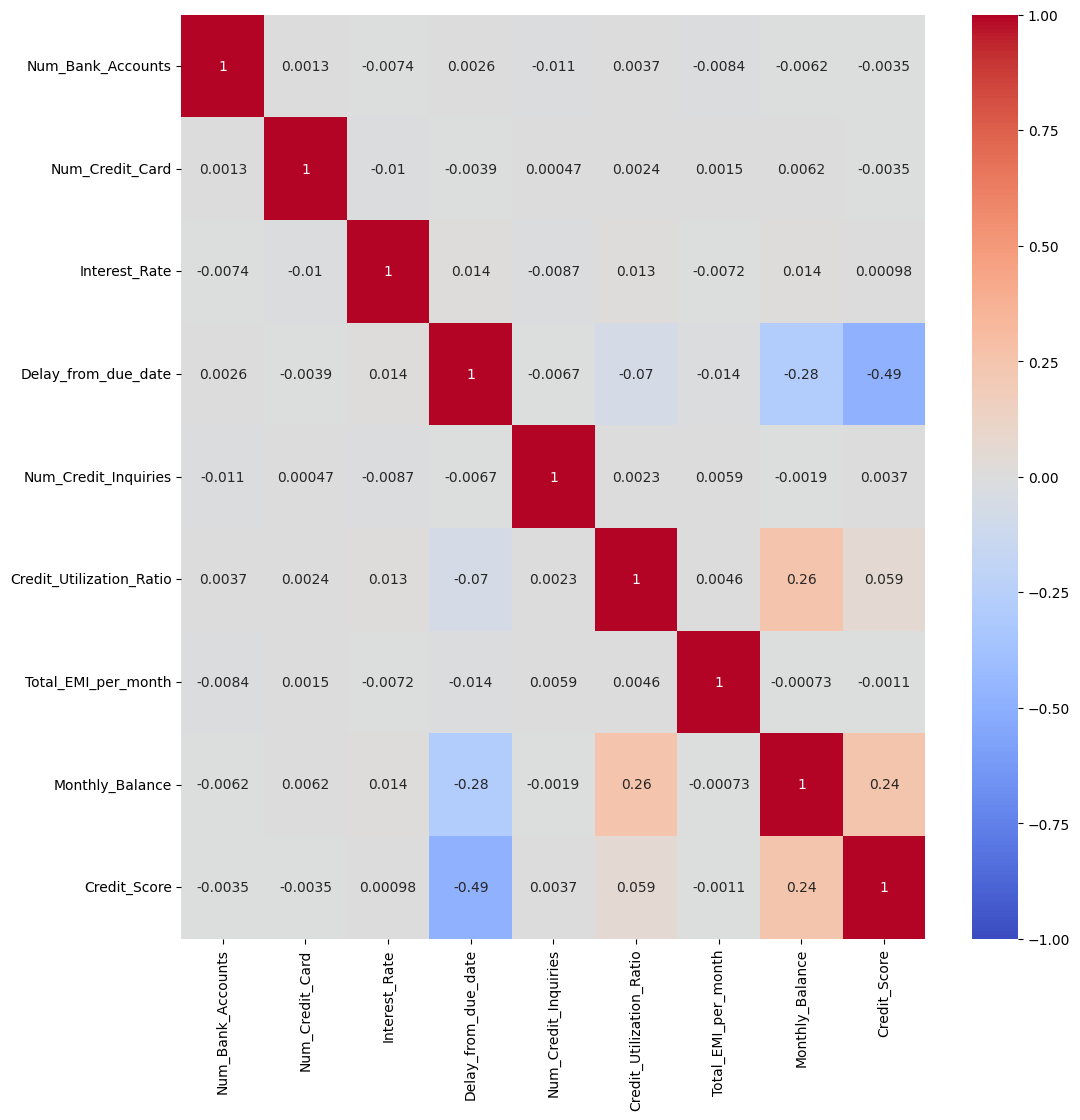

In [15]:
# corr(): 각 열 간의 상관 계수를 반환
# 피어슨, 켄달-타우, 스피어맨
plt.figure(figsize=(12, 12))
sns.heatmap(credit_df.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)

In [16]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  object 
 1   Occupation                12500 non-null  object 
 2   Annual_Income             12500 non-null  object 
 3   Num_Bank_Accounts         12500 non-null  int64  
 4   Num_Credit_Card           12500 non-null  int64  
 5   Interest_Rate             12500 non-null  int64  
 6   Num_of_Loan               12500 non-null  object 
 7   Type_of_Loan              11074 non-null  object 
 8   Delay_from_due_date       12500 non-null  int64  
 9   Num_of_Delayed_Payment    11657 non-null  object 
 10  Num_Credit_Inquiries      12264 non-null  float64
 11  Outstanding_Debt          12500 non-null  object 
 12  Credit_Utilization_Ratio  12500 non-null  float64
 13  Credit_History_Age        11387 non-null  object 
 14  Paymen

In [17]:
for i in credit_df.columns:
    if credit_df[i].dtype == 'O':
        print(i)

Age
Occupation
Annual_Income
Num_of_Loan
Type_of_Loan
Num_of_Delayed_Payment
Outstanding_Debt
Credit_History_Age
Payment_of_Min_Amount
Amount_invested_monthly
Payment_Behaviour


In [18]:
credit_df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,4.0,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.494089,2
1,28_,_______,34847.84,2,4,6,1,Credit-Builder Loan,3,4,2.0,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.2918252,Low_spent_Small_value_payments,470.690627,1
2,34,_______,143162.64,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8,3.0,1303.01,28.616735,17 Years and 9 Months,No,246.992320,168.4137027,!@9#%8,1043.315978,2
3,54,Entrepreneur,30689.89,2,5,4,1,Not Specified,0,6,4.0,632.46,26.544229,17 Years and 3 Months,No,16.415452,81.22885871,Low_spent_Large_value_payments,433.604773,1
4,21,Developer,35547.71_,7,5,5,0,NaN,5,NaN,4.0,943.86,39.797764,30 Years and 8 Months,Yes,0.000000,276.7253943,!@9#%8,288.605522,1


In [19]:
for i in ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Amount_invested_monthly']:
    credit_df[i] = pd.to_numeric(credit_df[i].str.replace('_', ''))

In [20]:
# Credit_History_Age의 데이터를 개월로 변경
# 22 Years and 1 Months -> 22 * 12 + 1
credit_df['Credit_History_Age'] = credit_df['Credit_History_Age'].str.replace(' Months', '')
credit_df['Credit_History_Age'] = pd.to_numeric(credit_df['Credit_History_Age'].str.split(' Years and ', expand=True)[0])*12 + pd.to_numeric(credit_df['Credit_History_Age'].str.split(' Years and ', expand=True)[1])

In [21]:
credit_df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,4.0,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2
1,28,_______,34847.84,2,4,6,1,Credit-Builder Loan,3,4.0,2.0,605.03,24.464031,319.0,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,1
2,34,_______,143162.64,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8.0,3.0,1303.01,28.616735,213.0,No,246.992320,168.413703,!@9#%8,1043.315978,2
3,54,Entrepreneur,30689.89,2,5,4,1,Not Specified,0,6.0,4.0,632.46,26.544229,207.0,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,1
4,21,Developer,35547.71,7,5,5,0,NaN,5,NaN,4.0,943.86,39.797764,368.0,Yes,0.000000,276.725394,!@9#%8,288.605522,1


In [22]:
credit_df.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,12500.000000,1.250000e+04,12500.000000,12500.000000,12500.00000,12500.00000,12500.000000,11657.000000,12264.000000,12500.000000,12500.000000,11387.000000,12500.000000,11935.000000,12366.000000,12500.000000
mean,113.371280,1.888617e+05,17.275120,21.647680,69.46520,3.43656,21.051440,31.280089,24.591650,1426.220376,32.291949,217.588127,1303.781040,643.291976,405.815391,0.871440
std,691.223297,1.482707e+06,118.518214,123.789969,455.95698,65.35565,14.859994,229.911798,183.422458,1155.169458,5.084327,99.638681,8118.261086,2063.324328,218.136964,0.654268
min,-500.000000,7.005930e+03,0.000000,1.000000,1.00000,-100.00000,-5.000000,-3.000000,0.000000,0.230000,20.992914,1.000000,0.000000,0.000000,0.088628,0.000000
25%,24.000000,1.948777e+04,3.000000,4.000000,8.00000,1.00000,10.000000,9.000000,2.000000,566.072500,28.110034,141.000000,29.128806,73.810753,271.785749,0.000000
50%,33.000000,3.765508e+04,6.000000,5.000000,13.00000,3.00000,18.000000,14.000000,4.000000,1166.155000,32.297912,215.000000,66.372879,134.201478,337.169588,1.000000
75%,42.000000,7.289813e+04,7.000000,7.000000,20.00000,5.00000,28.000000,18.000000,8.000000,1945.962500,36.458660,298.000000,149.904496,264.555831,475.222487,1.000000
max,8592.000000,2.365819e+07,1779.000000,1479.000000,5788.00000,1496.00000,67.000000,4388.000000,2592.000000,4998.070000,49.564519,397.000000,82122.000000,10000.000000,1602.040519,2.000000


In [23]:
credit_df = credit_df[credit_df['Age'] >= 0]

In [24]:
credit_df.sort_values('Age').tail(30)

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
9449,7615,Architect,34589.720,6,9,25,5,"Personal Loan, Student Loan, Home Equity Loan,...",23,18.0,8.0,3783.35,32.711927,65.0,Yes,111.689044,128.119632,High_spent_Small_value_payments,318.438990,0
7151,7711,Manager,15814.770,7,4,13,7,"Debt Consolidation Loan, Not Specified, Home E...",22,7.0,5.0,902.47,39.316759,233.0,NM,58.119995,10000.000000,Low_spent_Small_value_payments,190.621479,1
8974,7733,Doctor,21505.640,2,4,3,1,Not Specified,4,2.0,3.0,204.35,35.150663,184.0,No,11.620501,55.276752,Low_spent_Medium_value_payments,367.916413,2
11565,7753,_______,19826.670,6,3,33,5,"Student Loan, Home Equity Loan, Personal Loan,...",6,15.0,8.0,2052.89,35.653249,64.0,Yes,45.868928,121.807133,Low_spent_Small_value_payments,302.846189,0
6851,7762,Journalist,43549.860,7,5,24,9,"Student Loan, Debt Consolidation Loan, Mortgag...",27,21.0,6.0,4639.59,28.221137,145.0,Yes,193.114379,96.851718,High_spent_Small_value_payments,337.249403,1
9388,7849,Doctor,66554.310,4,6,15,3,"Payday Loan, Credit-Builder Loan, and Auto Loan",14,19.0,3.0,485.70,33.200830,223.0,No,101.923115,349.739377,Low_spent_Medium_value_payments,402.756758,1
565,7851,Engineer,20083.060,8,5,15,3,"Credit-Builder Loan, Mortgage Loan, and Credit...",20,23.0,7.0,2381.47,37.416601,107.0,Yes,33.819519,38.558298,High_spent_Medium_value_payments,363.281016,0
5718,7894,Teacher,99868.830,2,3,2,3,"Auto Loan, Credit-Builder Loan, and Auto Loan",5,9.0,1.0,693.76,30.253597,263.0,No,146.701253,838.623220,Low_spent_Small_value_payments,137.915778,2
12415,7901,Entrepreneur,64363.920,4,6,6,5,"Personal Loan, Credit-Builder Loan, Auto Loan,...",25,NaN,5.0,978.79,30.205522,110.0,Yes,176.843978,211.321489,High_spent_Medium_value_payments,423.000533,1
1414,7935,Developer,116809.000,3,1,3,3,"Debt Consolidation Loan, Credit-Builder Loan, ...",2,NaN,3.0,1312.44,34.458738,219.0,No,191.675705,190.976717,High_spent_Large_value_payments,838.555911,2


<Axes: ylabel='Age'>

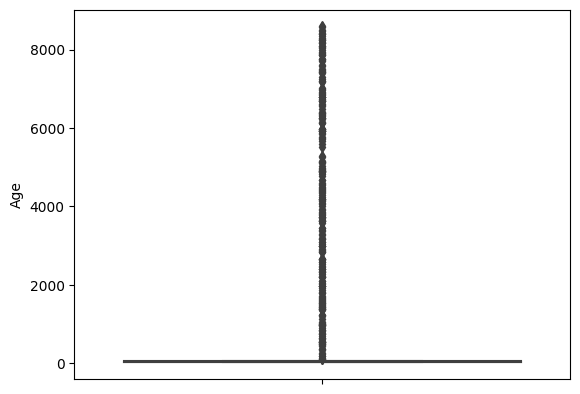

In [25]:
sns.boxplot(y=credit_df['Age'])

In [26]:
credit_df[credit_df['Age'] > 100].sort_values('Age')

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
3911,102,Musician,38460.280,6,9,16,7,"Personal Loan, Personal Loan, Home Equity Loan...",56,16.0,11.0,4106.50,26.537577,73.0,Yes,179.135821,267.336505,Low_spent_Medium_value_payments,157.630007,1
2416,126,Teacher,22050.560,5,4,12,1,Home Equity Loan,5,13.0,4.0,37.42,28.956967,387.0,NM,13.485884,NaN,High_spent_Medium_value_payments,359.927004,1
7418,169,Doctor,50109.760,6,3,4,1,Personal Loan,16,17.0,0.0,893.62,27.560776,191.0,NM,22.847438,351.547678,Low_spent_Large_value_payments,331.086217,2
952,181,_______,87957.020,2,5,9,4,"Home Equity Loan, Auto Loan, Credit-Builder Lo...",9,1.0,2.0,811.01,41.470014,231.0,No,195.913703,265.660815,High_spent_Medium_value_payments,533.800649,0
3197,216,Media_Manager,15829.875,4,2,4,1,Student Loan,10,NaN,3.0,968.61,34.361779,236.0,No,6.719535,NaN,Low_spent_Small_value_payments,352.096096,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12472,8425,Writer,18512.970,7,5,18,3,"Student Loan, Student Loan, and Mortgage Loan",15,11.0,6.0,1366.56,29.253092,131.0,Yes,24.621173,63.282651,High_spent_Medium_value_payments,311.570927,1
11218,8481,Journalist,15874.010,1,3,5,0,NaN,12,6.0,1.0,1173.38,24.443887,380.0,No,0.000000,53.610174,High_spent_Small_value_payments,311.373243,0
12439,8490,Lawyer,150131.680,5,1,4,0,NaN,8,-2.0,0.0,1138.36,30.013470,376.0,No,0.000000,949.847265,Low_spent_Small_value_payments,599.850069,1
9255,8587,Journalist,28286.240,4,7,7,1,Mortgage Loan,18,16.0,4.0,1406.94,33.599043,350.0,No,17.431672,41.114532,High_spent_Medium_value_payments,418.772462,1


In [27]:
credit_df = credit_df[credit_df['Age'] < 120]

In [28]:
credit_df.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,12126.000000,1.212600e+04,12126.000000,12126.000000,12126.000000,12126.000000,12126.000000,11304.000000,11892.000000,12126.000000,12126.000000,11045.000000,12126.000000,11584.000000,11995.000000,12126.000000
mean,33.049398,1.897604e+05,17.275606,21.458601,68.507917,3.179861,21.053604,31.464084,24.994871,1426.321231,32.293466,217.614396,1308.972585,641.812701,406.077932,0.870856
std,10.810043,1.486221e+06,118.546216,122.910157,453.592030,64.030581,14.857112,230.020040,185.478101,1155.255348,5.084805,99.405014,8131.974016,2059.907639,218.484165,0.653729
min,14.000000,7.005930e+03,0.000000,1.000000,1.000000,-100.000000,-5.000000,-3.000000,0.000000,0.230000,20.992914,1.000000,0.000000,0.000000,0.088628,0.000000
25%,24.000000,1.945750e+04,4.000000,4.000000,8.000000,1.000000,10.000000,9.000000,2.000000,565.967500,28.118929,141.000000,29.275040,73.698246,271.752715,0.000000
50%,33.000000,3.765508e+04,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,4.000000,1166.555000,32.285050,215.000000,66.196875,134.363758,337.123394,1.000000
75%,41.000000,7.305204e+04,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,8.000000,1945.677500,36.452073,297.000000,149.873130,265.384383,474.903731,1.000000
max,102.000000,2.365819e+07,1779.000000,1479.000000,5788.000000,1496.000000,67.000000,4388.000000,2592.000000,4998.070000,49.564519,397.000000,82122.000000,10000.000000,1602.040519,2.000000


In [29]:
# 연봉
2.365819e+07

23658190.0

In [30]:
len(credit_df[credit_df['Num_Bank_Accounts'] > 30]) / len(credit_df)

0.013029853207982847

In [31]:
credit_df = credit_df[credit_df['Num_Bank_Accounts'] <= 10]

In [32]:
credit_df.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,11968.000000,1.196800e+04,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11155.000000,11739.000000,11968.000000,11968.000000,10902.000000,11968.000000,11435.000000,11840.000000,11968.000000
mean,33.059241,1.906275e+05,5.374749,21.289606,68.378509,3.202958,21.070438,31.480592,25.259392,1426.112040,32.290274,217.519171,1316.881794,637.877772,406.065193,0.870572
std,10.805276,1.493985e+06,2.589361,121.976512,454.393273,64.430573,14.868583,231.016220,186.667973,1155.106304,5.084843,99.394703,8162.702164,2052.261335,218.516737,0.653619
min,14.000000,7.005930e+03,0.000000,1.000000,1.000000,-100.000000,-5.000000,-3.000000,0.000000,0.230000,20.992914,1.000000,0.000000,0.000000,0.088628,0.000000
25%,24.000000,1.943611e+04,3.000000,4.000000,8.000000,1.000000,10.000000,9.000000,2.000000,565.175000,28.110034,141.000000,29.292854,73.446749,271.845069,0.000000
50%,33.000000,3.757821e+04,6.000000,6.000000,13.000000,3.000000,18.000000,14.000000,4.000000,1167.045000,32.286924,215.000000,66.182932,133.519013,337.124205,1.000000
75%,41.000000,7.305026e+04,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,8.000000,1947.157500,36.441411,297.000000,149.824990,263.272841,475.278504,1.000000
max,102.000000,2.365819e+07,10.000000,1479.000000,5788.000000,1496.000000,67.000000,4388.000000,2592.000000,4998.070000,49.564519,397.000000,82122.000000,10000.000000,1602.040519,2.000000


In [33]:
len(credit_df[credit_df['Num_Credit_Card'] > 10]) / len(credit_df)

0.022142379679144383

In [34]:
credit_df = credit_df[credit_df['Num_Credit_Card'] <= 10]

In [35]:
credit_df.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,11703.000000,1.170300e+04,11703.000000,11703.000000,11703.000000,11703.000000,11703.000000,10903.000000,11480.000000,11703.00000,11703.000000,10652.000000,11703.000000,11180.000000,11578.000000,11703.000000
mean,33.049987,1.884282e+05,5.376399,5.537127,68.856362,3.186448,21.088268,31.785013,25.401742,1428.30559,32.285310,217.163068,1309.521881,641.250210,405.784155,0.869948
std,10.808971,1.484002e+06,2.593310,2.068797,457.627124,64.380015,14.899153,233.335849,187.642780,1156.44015,5.079688,99.525006,8141.405469,2059.087456,218.301576,0.653669
min,14.000000,7.005930e+03,0.000000,1.000000,1.000000,-100.000000,-5.000000,-3.000000,0.000000,0.23000,20.992914,1.000000,0.000000,0.000000,0.088628,0.000000
25%,24.000000,1.942758e+04,3.000000,4.000000,8.000000,1.000000,10.000000,9.000000,2.000000,565.31000,28.112036,140.000000,29.562116,73.229301,271.681508,0.000000
50%,33.000000,3.764810e+04,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,4.000000,1167.04000,32.282544,215.000000,66.400432,133.865834,336.838358,1.000000
75%,41.000000,7.304866e+04,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,8.000000,1953.03500,36.424405,297.000000,150.046222,263.681454,475.301587,1.000000
max,102.000000,2.365819e+07,10.000000,10.000000,5788.000000,1496.000000,67.000000,4388.000000,2592.000000,4998.07000,49.564519,397.000000,82122.000000,10000.000000,1602.040519,2.000000


In [36]:
credit_df = credit_df[credit_df['Interest_Rate'] <= 40]

In [37]:
credit_df.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,11487.000000,1.148700e+04,11487.000000,11487.000000,11487.000000,11487.000000,11487.000000,10695.000000,11270.000000,11487.000000,11487.000000,10454.000000,11487.000000,10974.000000,11363.000000,11487.000000
mean,33.049534,1.866684e+05,5.378950,5.537564,14.581788,3.085836,21.072691,32.148481,25.614907,1428.211763,32.274850,217.182227,1309.892277,643.294691,405.462098,0.868982
std,10.807228,1.473331e+06,2.592557,2.069015,8.770185,63.612514,14.868582,235.577742,188.958957,1156.852697,5.081655,99.618121,8148.091946,2063.815555,217.887346,0.653006
min,14.000000,7.005930e+03,0.000000,1.000000,1.000000,-100.000000,-5.000000,-3.000000,0.000000,0.230000,20.992914,1.000000,0.000000,0.000000,0.088628,0.000000
25%,24.000000,1.939846e+04,3.000000,4.000000,7.000000,1.000000,10.000000,9.000000,2.000000,565.410000,28.109912,140.000000,29.601005,73.162675,271.686486,0.000000
50%,33.000000,3.747152e+04,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,4.000000,1166.640000,32.257865,215.000000,66.158038,133.820509,336.822178,1.000000
75%,41.000000,7.289110e+04,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,8.000000,1951.100000,36.402664,297.000000,149.533496,263.669812,474.566180,1.000000
max,102.000000,2.365819e+07,10.000000,10.000000,34.000000,1496.000000,67.000000,4388.000000,2592.000000,4998.070000,49.564519,397.000000,82122.000000,10000.000000,1602.040519,2.000000


In [38]:
len(credit_df[credit_df['Num_of_Loan'] > 10]) / len(credit_df)

0.005310350831374598

In [39]:
credit_df = credit_df[(credit_df['Num_of_Loan'] <= 10) & (credit_df['Num_of_Loan'] >= 0)]

In [40]:
credit_df.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,10959.000000,1.095900e+04,10959.000000,10959.000000,10959.000000,10959.000000,10959.000000,10208.000000,10753.000000,10959.000000,10959.000000,9964.000000,10959.000000,10465.000000,10837.000000,10959.000000
mean,33.041427,1.884072e+05,5.386805,5.536363,14.593211,3.551966,21.081121,32.159483,25.398400,1431.045234,32.280924,216.876355,1323.307649,646.361810,405.453936,0.867871
std,10.814220,1.479380e+06,2.592922,2.068353,8.772065,2.445093,14.866980,235.548964,187.855849,1157.934074,5.083605,99.449671,8211.325128,2068.674211,218.063190,0.651887
min,14.000000,7.005930e+03,0.000000,1.000000,1.000000,0.000000,-5.000000,-3.000000,0.000000,0.230000,20.992914,1.000000,0.000000,0.000000,0.088628,0.000000
25%,24.000000,1.939791e+04,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,2.000000,566.540000,28.134686,140.000000,29.634492,73.207141,271.789642,0.000000
50%,33.000000,3.767919e+04,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,4.000000,1166.470000,32.242619,214.000000,66.334750,133.568502,336.822178,1.000000
75%,41.000000,7.305115e+04,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,8.000000,1961.510000,36.409723,296.000000,150.135520,265.706212,474.061722,1.000000
max,102.000000,2.365819e+07,10.000000,10.000000,34.000000,9.000000,67.000000,4388.000000,2592.000000,4998.070000,49.564519,397.000000,82122.000000,10000.000000,1602.040519,2.000000


In [41]:
credit_df = credit_df[credit_df['Delay_from_due_date'] >= 0]

In [42]:
len(credit_df[credit_df['Num_of_Delayed_Payment'] > 40]) / len(credit_df)

0.007340122947059363

In [43]:
credit_df = credit_df[(credit_df['Num_of_Delayed_Payment'] >= 0) & (credit_df['Num_of_Delayed_Payment'] <= 30)]

In [44]:
credit_df.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,10002.000000,1.000200e+04,10002.000000,10002.000000,10002.000000,10002.000000,10002.00000,10002.000000,9814.000000,10002.000000,10002.000000,9104.000000,10002.000000,9547.000000,9893.000000,10002.000000
mean,32.968406,1.935583e+05,5.417716,5.554789,14.709758,3.570886,21.29764,13.465007,25.625943,1439.794782,32.292003,215.808216,1339.797436,641.939750,403.918970,0.858528
std,10.831651,1.511306e+06,2.582985,2.065096,8.784414,2.445123,14.83699,6.201547,188.187465,1161.828644,5.093325,99.435323,8284.933619,2060.942992,216.227940,0.649646
min,14.000000,7.005930e+03,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.340000,20.992914,1.000000,0.000000,0.000000,0.088628,0.000000
25%,24.000000,1.938372e+04,4.000000,4.000000,8.000000,2.000000,10.00000,9.000000,2.000000,572.750000,28.139668,139.750000,29.867829,72.716328,271.565853,0.000000
50%,33.000000,3.779779e+04,6.000000,5.000000,13.000000,3.000000,18.00000,14.000000,4.000000,1173.755000,32.255683,213.000000,66.419970,132.962276,336.452745,1.000000
75%,41.000000,7.258242e+04,7.000000,7.000000,20.000000,5.000000,28.00000,18.000000,8.000000,1981.990000,36.433628,296.000000,149.683104,265.027815,471.852376,1.000000
max,102.000000,2.365819e+07,10.000000,10.000000,34.000000,9.000000,67.00000,28.000000,2592.000000,4998.070000,49.564519,397.000000,82122.000000,10000.000000,1602.040519,2.000000


In [45]:
credit_df['Num_Credit_Inquiries'] = credit_df['Num_Credit_Inquiries'].fillna(0)

In [46]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10002 entries, 0 to 12498
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       10002 non-null  int64  
 1   Occupation                10002 non-null  object 
 2   Annual_Income             10002 non-null  float64
 3   Num_Bank_Accounts         10002 non-null  int64  
 4   Num_Credit_Card           10002 non-null  int64  
 5   Interest_Rate             10002 non-null  int64  
 6   Num_of_Loan               10002 non-null  int64  
 7   Type_of_Loan              8893 non-null   object 
 8   Delay_from_due_date       10002 non-null  int64  
 9   Num_of_Delayed_Payment    10002 non-null  float64
 10  Num_Credit_Inquiries      10002 non-null  float64
 11  Outstanding_Debt          10002 non-null  float64
 12  Credit_Utilization_Ratio  10002 non-null  float64
 13  Credit_History_Age        9104 non-null   float64
 14  Paymen

In [47]:
credit_df.isna().sum()

Age                            0
Occupation                     0
Annual_Income                  0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                1109
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Num_Credit_Inquiries           0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age           898
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly      455
Payment_Behaviour              0
Monthly_Balance              109
Credit_Score                   0
dtype: int64

In [48]:
credit_df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,4.0,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2
1,28,_______,34847.84,2,4,6,1,Credit-Builder Loan,3,4.0,2.0,605.03,24.464031,319.0,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,1
2,34,_______,143162.64,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8.0,3.0,1303.01,28.616735,213.0,No,246.992320,168.413703,!@9#%8,1043.315978,2
3,54,Entrepreneur,30689.89,2,5,4,1,Not Specified,0,6.0,4.0,632.46,26.544229,207.0,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,1
6,33,Lawyer,131313.40,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,3.0,2.0,352.16,32.200509,367.0,NM,137.644605,378.171253,High_spent_Medium_value_payments,858.462474,2


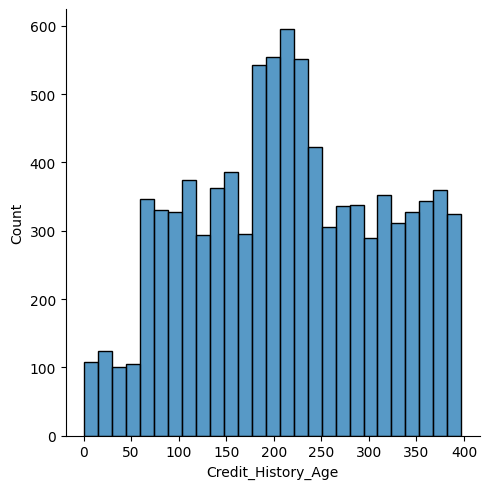

In [49]:
sns.displot(credit_df['Credit_History_Age'])

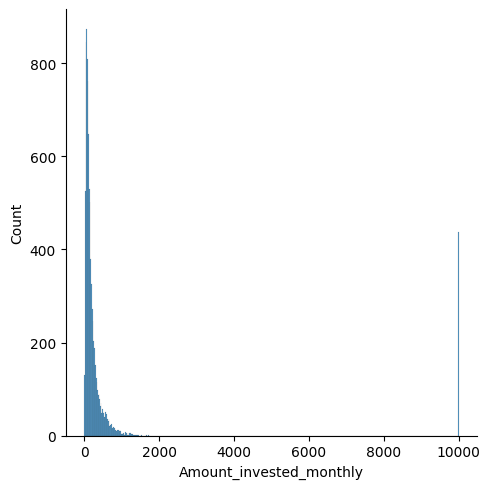

In [50]:
sns.displot(credit_df['Amount_invested_monthly'])

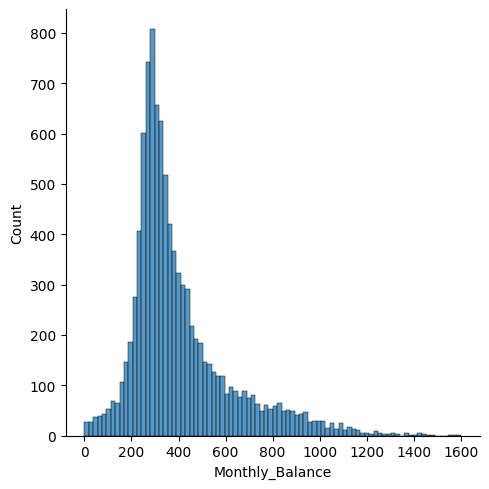

In [51]:
sns.displot(credit_df['Monthly_Balance'])

In [52]:
credit_df = credit_df.fillna(credit_df.median())

<ipython-input-52-98962993b203>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  credit_df = credit_df.fillna(credit_df.median())


In [53]:
credit_df.isna().sum()

Age                            0
Occupation                     0
Annual_Income                  0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                1109
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Num_Credit_Inquiries           0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
dtype: int64

In [54]:
credit_df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,4.0,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2
1,28,_______,34847.84,2,4,6,1,Credit-Builder Loan,3,4.0,2.0,605.03,24.464031,319.0,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,1
2,34,_______,143162.64,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8.0,3.0,1303.01,28.616735,213.0,No,246.992320,168.413703,!@9#%8,1043.315978,2
3,54,Entrepreneur,30689.89,2,5,4,1,Not Specified,0,6.0,4.0,632.46,26.544229,207.0,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,1
6,33,Lawyer,131313.40,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,3.0,2.0,352.16,32.200509,367.0,NM,137.644605,378.171253,High_spent_Medium_value_payments,858.462474,2


* Type_of_Loan에 존재하는 모든 대출 이름을 확인하기
* type_list에 저장

In [55]:
credit_df['Type_of_Loan'] = credit_df['Type_of_Loan'].str.replace('and ', '')

In [56]:
credit_df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,4.0,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2
1,28,_______,34847.84,2,4,6,1,Credit-Builder Loan,3,4.0,2.0,605.03,24.464031,319.0,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,1
2,34,_______,143162.64,1,5,8,3,"Auto Loan, Auto Loan, Not Specified",5,8.0,3.0,1303.01,28.616735,213.0,No,246.992320,168.413703,!@9#%8,1043.315978,2
3,54,Entrepreneur,30689.89,2,5,4,1,Not Specified,0,6.0,4.0,632.46,26.544229,207.0,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,1
6,33,Lawyer,131313.40,0,1,8,2,"Credit-Builder Loan, Mortgage Loan",0,3.0,2.0,352.16,32.200509,367.0,NM,137.644605,378.171253,High_spent_Medium_value_payments,858.462474,2


In [57]:
credit_df['Type_of_Loan'] = credit_df['Type_of_Loan'].fillna('No Loan')

In [58]:
credit_df.isna().sum()

Age                         0
Occupation                  0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Num_Credit_Inquiries        0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [59]:
type_list = set(credit_df['Type_of_Loan'].str.split(', ').sum())
type_list

{'Auto Loan',
 'Credit-Builder Loan',
 'Debt Consolidation Loan',
 'Home Equity Loan',
 'Mortgage Loan',
 'No Loan',
 'Not Specified',
 'Payday Loan',
 'Personal Loan',
 'Student Loan'}

In [60]:
# credit_df['Type_of_Loan'].unique()

In [61]:
# type_set = set()

# for i in credit_df['Type_of_Loan'].unique():
#     if type(i) == str:
#         i = i.replace('and ', '')
#         for j in i.split(', '):
#             type_set.add(j)

In [62]:
# type_list = list(type_set)

In [63]:
# type_list

* 모든 대출이름을 파생변수로 생성
* 해당 대출을 발생한 경우 1 아니면 0으로 채움

In [64]:
for i in type_list:
    credit_df[i] = credit_df['Type_of_Loan'].apply(lambda x: 1 if i in x else 0)

In [65]:
credit_df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Mortgage Loan,Debt Consolidation Loan,Personal Loan,Home Equity Loan,Not Specified,Payday Loan,Credit-Builder Loan,Student Loan,No Loan
0,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,4.0,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2,1,0,0,1,1,0,0,1,0,0
1,28,_______,34847.84,2,4,6,1,Credit-Builder Loan,3,4.0,2.0,605.03,24.464031,319.0,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,1,0,0,0,0,0,0,0,1,0,0
2,34,_______,143162.64,1,5,8,3,"Auto Loan, Auto Loan, Not Specified",5,8.0,3.0,1303.01,28.616735,213.0,No,246.992320,168.413703,!@9#%8,1043.315978,2,1,0,0,0,0,1,0,0,0,0
3,54,Entrepreneur,30689.89,2,5,4,1,Not Specified,0,6.0,4.0,632.46,26.544229,207.0,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,1,0,0,0,0,0,1,0,0,0,0
6,33,Lawyer,131313.40,0,1,8,2,"Credit-Builder Loan, Mortgage Loan",0,3.0,2.0,352.16,32.200509,367.0,NM,137.644605,378.171253,High_spent_Medium_value_payments,858.462474,2,0,1,0,0,0,0,0,1,0,0


In [66]:
# credit_df['Type_of_Loan'].isna().sum()

In [67]:
# credit_df['Type_of_Loan'] = credit_df['Type_of_Loan'].fillna('')

In [68]:
# for i in type_list:
#     string = 'Type_of_Loan_' + i.replace(' ', '_')
#     credit_df[string] = credit_df['Type_of_Loan'].apply(lambda x: 0 if str(x).find(i) else 1)

In [69]:
# credit_df

In [70]:
credit_df.drop('Type_of_Loan', axis=1, inplace=True)

In [71]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10002 entries, 0 to 12498
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       10002 non-null  int64  
 1   Occupation                10002 non-null  object 
 2   Annual_Income             10002 non-null  float64
 3   Num_Bank_Accounts         10002 non-null  int64  
 4   Num_Credit_Card           10002 non-null  int64  
 5   Interest_Rate             10002 non-null  int64  
 6   Num_of_Loan               10002 non-null  int64  
 7   Delay_from_due_date       10002 non-null  int64  
 8   Num_of_Delayed_Payment    10002 non-null  float64
 9   Num_Credit_Inquiries      10002 non-null  float64
 10  Outstanding_Debt          10002 non-null  float64
 11  Credit_Utilization_Ratio  10002 non-null  float64
 12  Credit_History_Age        10002 non-null  float64
 13  Payment_of_Min_Amount     10002 non-null  object 
 14  Total_

In [72]:
credit_df['Occupation'].value_counts()

_______          673
Lawyer           664
Mechanic         646
Scientist        640
Engineer         640
Architect        632
Teacher          624
Developer        621
Entrepreneur     620
Media_Manager    616
Accountant       611
Doctor           608
Musician         607
Journalist       606
Manager          602
Writer           592
Name: Occupation, dtype: int64

In [73]:
credit_df['Occupation'] = credit_df['Occupation'].replace('_______', 'Unknown')

In [74]:
credit_df['Occupation'].value_counts()

Unknown          673
Lawyer           664
Mechanic         646
Scientist        640
Engineer         640
Architect        632
Teacher          624
Developer        621
Entrepreneur     620
Media_Manager    616
Accountant       611
Doctor           608
Musician         607
Journalist       606
Manager          602
Writer           592
Name: Occupation, dtype: int64

In [75]:
credit_df['Payment_of_Min_Amount'].value_counts()

Yes    5315
No     3489
NM     1198
Name: Payment_of_Min_Amount, dtype: int64

In [76]:
credit_df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      2505
High_spent_Medium_value_payments    1794
High_spent_Large_value_payments     1453
Low_spent_Medium_value_payments     1376
High_spent_Small_value_payments     1136
Low_spent_Large_value_payments       994
!@9#%8                               744
Name: Payment_Behaviour, dtype: int64

In [77]:
credit_df['Payment_Behaviour'] = credit_df['Payment_Behaviour'].replace('!@9#%8', 'Unknown')

In [78]:
credit_df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      2505
High_spent_Medium_value_payments    1794
High_spent_Large_value_payments     1453
Low_spent_Medium_value_payments     1376
High_spent_Small_value_payments     1136
Low_spent_Large_value_payments       994
Unknown                              744
Name: Payment_Behaviour, dtype: int64

In [79]:
credit_df = pd.get_dummies(credit_df, columns=['Occupation', 'Payment_of_Min_Amount', 'Payment_Behaviour'])

In [80]:
credit_df.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Auto Loan,Mortgage Loan,Debt Consolidation Loan,Personal Loan,Home Equity Loan,Not Specified,Payday Loan,Credit-Builder Loan,Student Loan,...,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Unknown,Occupation_Writer,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_Behaviour_Unknown
0,23,19114.12,3,4,3,4,3,7.0,4.0,809.98,26.822620,265.0,49.574949,80.415295,312.494089,2,1,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1,28,34847.84,2,4,6,1,3,4.0,2.0,605.03,24.464031,319.0,18.816215,104.291825,470.690627,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,34,143162.64,1,5,8,3,5,8.0,3.0,1303.01,28.616735,213.0,246.992320,168.413703,1043.315978,2,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,54,30689.89,2,5,4,1,0,6.0,4.0,632.46,26.544229,207.0,16.415452,81.228859,433.604773,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
6,33,131313.40,0,1,8,2,0,3.0,2.0,352.16,32.200509,367.0,137.644605,378.171253,858.462474,2,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [81]:
from sklearn.model_selection import train_test_split

In [82]:
len(credit_df)

10002

In [83]:
X_train, X_test, y_train, y_test = train_test_split(credit_df.drop('Credit_Score', axis=1), credit_df['Credit_Score'], test_size=0.2, random_state=10)

# 2. lightGBM(LGBM)
* 트리기반 학습 알고리즘인 gradient boosting 방식의 프레임 워크
* 의사결정나무, 랜덤포레스트는 균형 트리 분할(level wise) 방식이라면, LGBM은 리프 중심 트리 분할(leaf wise)
* GBM(Gradient Boosting): 모델1을 통해 y를 예측하고, 모델2에 데이터를 넣어 y를 예측, 모델3에 넣어 y를 예측하는 방식
* 학습하는데 걸리는 시간이 적음(빠른 속도)
* 메모리 사용량이 상대적으로 적은편
* 적은 데이터셋을 사용할 경우 과적합 가능성이 매우 큼(일반적으로 데이터가 10000개 이상은 사용해야 함)

In [84]:
from lightgbm import LGBMClassifier

In [85]:
base_model = LGBMClassifier(random_state=10)

In [86]:
base_model.fit(X_train, y_train)

LGBMClassifier(random_state=10)

In [87]:
pred1 = base_model.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [89]:
accuracy_score(y_test, pred1)

0.7351324337831084

In [90]:
confusion_matrix(y_test, pred1)

array([[407, 148,  27],
       [145, 896,  91],
       [  3, 116, 168]])

In [91]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.73      0.70      0.72       582
           1       0.77      0.79      0.78      1132
           2       0.59      0.59      0.59       287

    accuracy                           0.74      2001
   macro avg       0.70      0.69      0.69      2001
weighted avg       0.73      0.74      0.73      2001



In [92]:
proba1 = base_model.predict_proba(X_test)
proba1

array([[6.98737764e-02, 8.38143193e-01, 9.19830307e-02],
       [8.50755391e-01, 1.49084385e-01, 1.60223719e-04],
       [2.74240729e-03, 9.96809944e-01, 4.47648956e-04],
       ...,
       [8.60948233e-01, 1.38960947e-01, 9.08196360e-05],
       [8.96972732e-01, 1.02822925e-01, 2.04342759e-04],
       [6.65766332e-02, 2.29493501e-01, 7.03929866e-01]])

In [93]:
6.98737764e-02

0.0698737764

In [94]:
8.38143193e-01

0.838143193

In [95]:
9.19830307e-02

0.0919830307

In [96]:
roc_auc_score(y_test, proba1, multi_class='ovr')

0.8972566425279517

# 3. RandomizedSearchCV
* 분류기를 결정하고 해당 분류기의 최적의 하이퍼 파라미터를 찾기 위한 방법
* 튜닐하고싶은 파라미터를 지정하여 파라미터 값의 범위를 정하고, n_iter값을 설정하여 해당 수 만큼 Random하게 조합하여 반복 적용

In [97]:
# n_estimators: 반복 수행하는 트리의 갯수(기본값: 100), 값을 크게 지정하면 학습시간도 오래걸리며, 과적합이 발생할 수 있음
# max_depth: 트리의 최대 깊이(기본값: -1) 최대 깊이 지정 x = -1
# learning_rate: 학습률(기본값:0.1)
params = {
    'n_estimators':[100, 300, 500, 1000],
    'max_depth':[-1, 30, 50, 100],
    'num_leaves':[5, 10, 20, 50],
    'learning_rate':[0.01, 0.05, 0.1, 0.5]
}

In [98]:
lgbm = LGBMClassifier(random_state=10)

In [99]:
from sklearn.model_selection import RandomizedSearchCV

In [100]:
rand_lgbm = RandomizedSearchCV(lgbm, params, n_iter=30, random_state=10)

In [105]:
rand_lgbm.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [102]:
rand_lgbm.cv_results_

{'mean_fit_time': array([6.06993661, 1.902918  , 0.23854785, 1.47410035, 1.21911325,
        3.39912567, 2.59754848, 0.36130605, 2.41769791, 2.45184007,
        0.83196058, 1.28609872, 9.02727141, 1.48701854, 0.5987525 ,
        1.64444904, 2.7160274 , 4.77732577, 2.41969414, 0.7808239 ,
        0.77217517, 1.58909945, 1.06321745, 8.83453264, 3.78754425,
        4.51757298, 2.85035753, 0.815558  , 1.73884292, 3.05253768]),
 'std_fit_time': array([3.42274939, 0.9549801 , 0.01018195, 0.91913946, 0.05014476,
        1.93420652, 0.86197611, 0.02120746, 0.9584126 , 1.00603738,
        0.00877273, 0.97433161, 1.22693937, 0.60869056, 0.010763  ,
        0.88961086, 0.99614669, 1.24644726, 1.00187799, 0.03314173,
        0.97842663, 0.9613933 , 0.9497512 , 1.37869515, 1.22681436,
        0.9314779 , 1.00658619, 0.03571387, 0.83158866, 0.97404291]),
 'mean_score_time': array([0.1821692 , 0.05518007, 0.01193957, 0.07445941, 0.06318593,
        0.1348443 , 0.13338113, 0.01409411, 0.15002856, 0.12

In [103]:
rand_lgbm.best_params_

{'num_leaves': 20, 'n_estimators': 300, 'max_depth': 50, 'learning_rate': 0.01}

In [104]:
lgbm = LGBMClassifier(random_state=10, num_leaves= 20, n_estimators= 300, max_depth= 50, learning_rate= 0.01)

In [107]:
lgbm.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.01, max_depth=50, n_estimators=300,
               num_leaves=20, random_state=10)

In [109]:
proba = lgbm.predict_proba(X_test)

In [110]:
roc_auc_score(y_test, proba, multi_class='ovr')

0.9024448184054178

In [111]:
# 하이퍼 파라미터 튜닝전: 0.8972566425279517
# 하이퍼 파라미터 튜닝후: 0.9024448184054178
0.9024448184054178 - 0.8972566425279517

0.005188175877466117